# Tensorflow Basics

In [1]:
import tensorflow as tf
tf.__version__

'2.3.1'

### Load Dataset

In [2]:
(xtrain,ytrain),(xtest,ytest) = tf.keras.datasets.mnist.load_data()

In [3]:
# check shape of train and test data
xtrain.shape

(60000, 28, 28)

In [4]:
ytrain.shape

(60000,)

In [5]:
xtest.shape

(10000, 28, 28)

In [6]:
ytest.shape

(10000,)

In [7]:
xtrain[0:3][0]

# xtrain is 3 dimensional numpy array which contains 60000k sample of image of 
# size 28 * 28

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
# Lets check the images that we are processing on
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
print("Xtrain contains Imagage:")
plt.imshow(xtrain[0])
# xtrain[0] is 5
print("ytain contains :",ytrain[0])

Xtrain contains Imagage:
ytain contains : 5


Xtrain contains Imagage:
ytain contains : 7


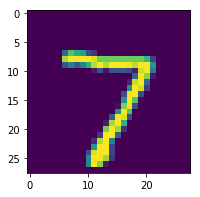

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
print("Xtrain contains Imagage:")
plt.imshow(xtest[0])
# xtrain[0] is 5
print("ytain contains :",ytest[0])

In [10]:
# Data in xtrain and xtest need to be scaled as it contains the values 
# from 0 to 255

xtrain[0:3][0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
# Perform the scalling

xtrain = xtrain/255
xtest = xtest/255

xtrain[0:3][0]
# values are scalled between 0 to 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Build a Machine Learning Model

In [12]:
# Reshape data in 2D

xtrain_r = xtrain.reshape(60000,(28*28))
xtest_r = xtest.reshape(10000,(28*28))

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(28*28,),activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid'),
])

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy'],)

model.fit(xtrain_r,ytrain, epochs=5)

# Model gives accuracy of 96% on training data

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - accuracy: 0.8870 - loss: 0.3825
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - accuracy: 0.9443 - loss: 0.1893
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - accuracy: 0.9572 - loss: 0.1444
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - accuracy: 0.9643 - loss: 0.1192
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - accuracy: 0.9693 - loss: 0.1052


### Evaluate Model

In [14]:
model.evaluate(xtest_r,ytest)
# Model gives accuracy of 96% on test data

313/313 [==============================] - 0s 705us/step - accuracy: 0.9624 - loss: 0.1245


[0.12447071820497513, 0.9624000191688538]

In [15]:
pred = model.predict(xtest_r)

In [16]:
pred[0]

            

array([2.5973603e-07, 1.7604009e-07, 1.2926695e-05, 3.2613356e-05,
       1.9113734e-10, 1.7653949e-08, 1.4201615e-12, 4.6343595e-01,
       3.2460212e-06, 1.7360537e-06], dtype=float32)

In [17]:
import numpy as np
np.argmax(pred[1])

2

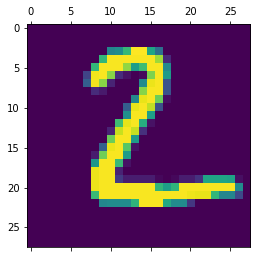

In [18]:
plt.matshow(xtest[1])

In [19]:
# lets create Labels from probabilities in pred

pred_label = []

pred_label = [np.argmax(x) for x in pred]

In [20]:
pred_label[0]

7

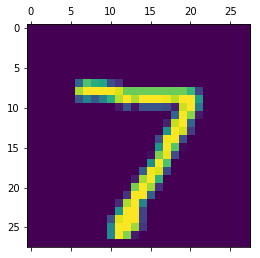

In [21]:
plt.matshow(xtest[0])